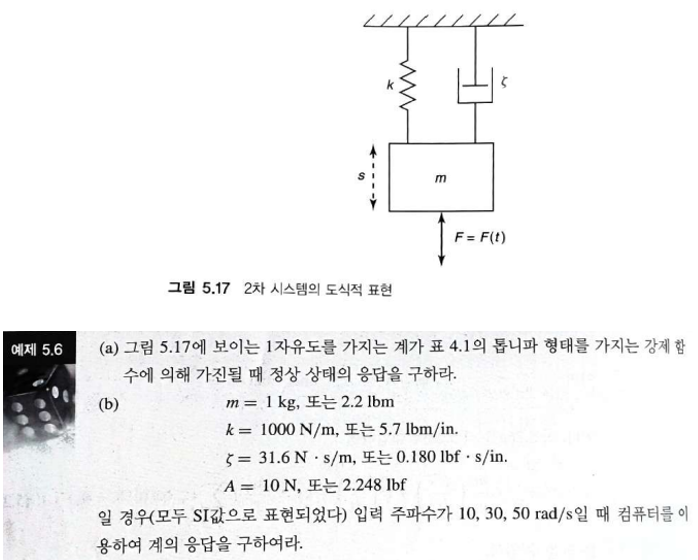

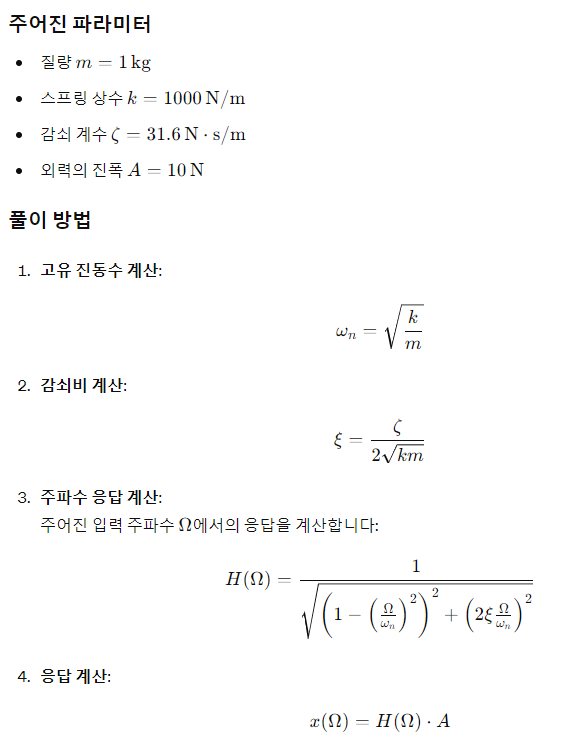

입력 주파수 10 rad/s에서의 응답: 10.48 m
입력 주파수 30 rad/s에서의 응답: 10.49 m
입력 주파수 50 rad/s에서의 응답: 4.59 m


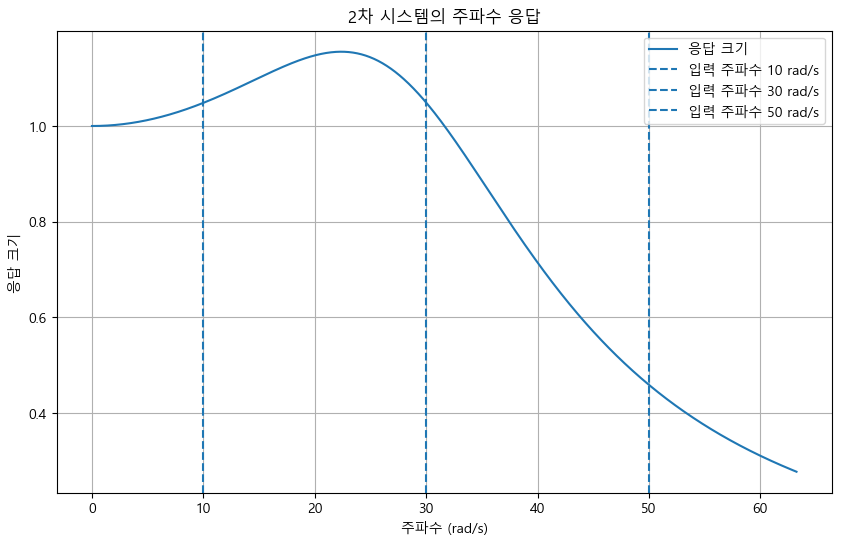

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 주어진 상수
m = 1  # 질량 (kg)
k = 1000  # 스프링 상수 (N/m)
zeta = 31.6  # 감쇠 계수 (N·s/m)
A = 10  # 외력의 진폭 (N)

# 고유 진동수 계산
omega_n = np.sqrt(k / m)

# 감쇠비 계산
xi = zeta / (2 * np.sqrt(k * m))

# 입력 주파수
Omegas = [10, 30, 50]  # rad/s

# 응답 계산
responses = {}
for Omega in Omegas:
    H_Omega = 1 / np.sqrt((1 - (Omega / omega_n)**2)**2 + (2 * xi * Omega / omega_n)**2)
    x_Omega = H_Omega * A
    responses[Omega] = x_Omega

# 결과 출력
for Omega, response in responses.items():
    print(f"입력 주파수 {Omega} rad/s에서의 응답: {response:.2f} m")

# 주파수 응답 시각화
f_range = np.linspace(0, 2 * omega_n, 1000)
omega_range = f_range
H = 1 / np.sqrt((1 - (omega_range / omega_n)**2)**2 + (2 * xi * omega_range / omega_n)**2)

plt.figure(figsize=(10, 6))
plt.plot(omega_range, H, label='응답 크기')
for Omega in Omegas:
    plt.axvline(Omega, linestyle='--', label=f'입력 주파수 {Omega} rad/s')
plt.title('2차 시스템의 주파수 응답')
plt.xlabel('주파수 (rad/s)')
plt.ylabel('응답 크기')
plt.grid(True)
plt.legend()
plt.show()
